# Apple products price prediction 

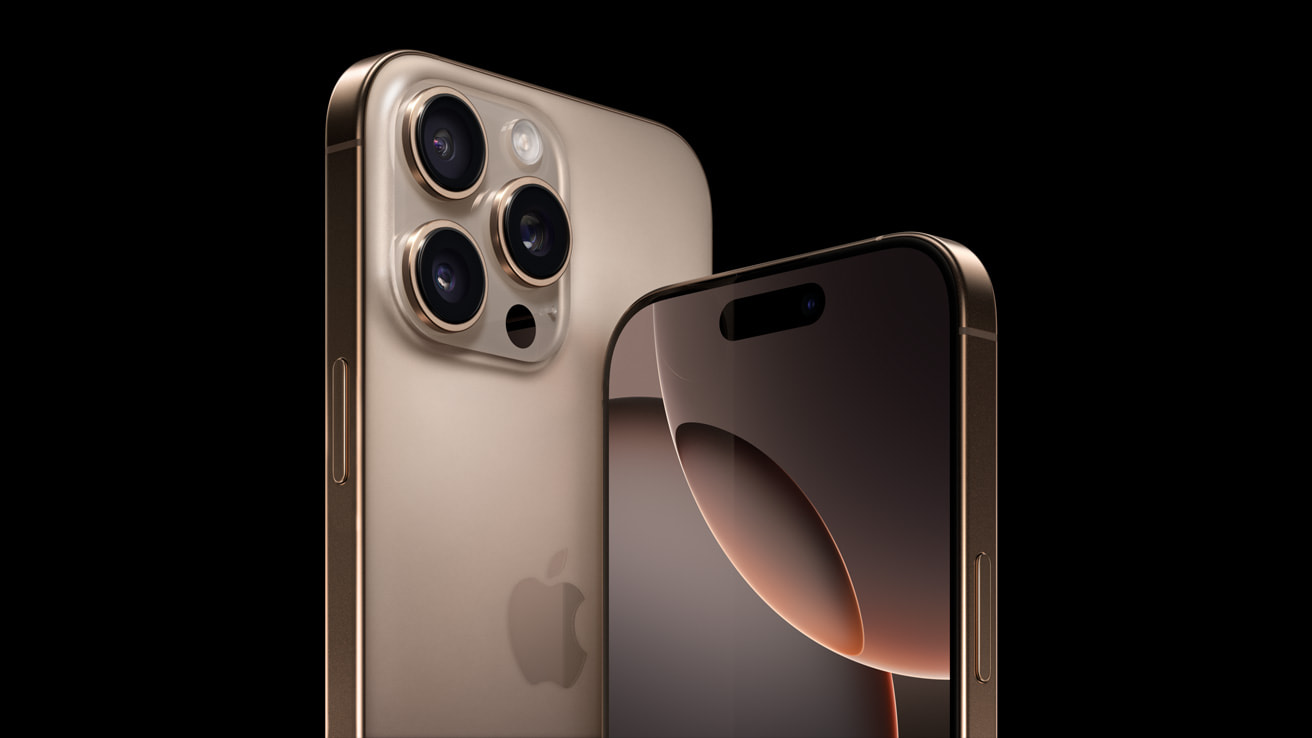

# Project Aim:

To develop a machine learning model that accurately predicts the prices of Apple products (such as iPhones, iPads, MacBooks, etc.) based on key features including product specifications, release year, condition, and market trends, enabling consumers, retailers, and resellers to make informed pricing decisions.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('apple_products.csv')
df

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,49900,49900,0,3431,356,MOBEXRGV7EHHTGUH,4.6,2 GB
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVAC6TJT4F,4.6,2 GB
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVGETABXWZ,4.6,2 GB
3,"APPLE iPhone 8 (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-silver...,Apple,77000,77000,0,11202,794,MOBEXRGVMZWUHCBA,4.5,2 GB
4,"APPLE iPhone 8 (Gold, 256 GB)",https://www.flipkart.com/apple-iphone-8-gold-2...,Apple,77000,77000,0,11202,794,MOBEXRGVPK7PFEJZ,4.5,2 GB
...,...,...,...,...,...,...,...,...,...,...,...
57,"APPLE iPhone SE (Black, 64 GB)",https://www.flipkart.com/apple-iphone-se-black...,Apple,29999,39900,24,95909,8161,MOBFWQ6BR3MK7AUG,4.5,4 GB
58,"APPLE iPhone 11 (Purple, 64 GB)",https://www.flipkart.com/apple-iphone-11-purpl...,Apple,46999,54900,14,43470,3331,MOBFWQ6BTFFJKGKE,4.6,4 GB
59,"APPLE iPhone 11 (White, 64 GB)",https://www.flipkart.com/apple-iphone-11-white...,Apple,46999,54900,14,43470,3331,MOBFWQ6BVWVEH3XE,4.6,4 GB
60,"APPLE iPhone 11 (Black, 64 GB)",https://www.flipkart.com/apple-iphone-11-black...,Apple,46999,54900,14,43470,3331,MOBFWQ6BXGJCEYNY,4.6,4 GB


# Basic Checks 

In [3]:
df.shape

(62, 11)

In [4]:
df.head()

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,49900,49900,0,3431,356,MOBEXRGV7EHHTGUH,4.6,2 GB
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVAC6TJT4F,4.6,2 GB
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVGETABXWZ,4.6,2 GB
3,"APPLE iPhone 8 (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-silver...,Apple,77000,77000,0,11202,794,MOBEXRGVMZWUHCBA,4.5,2 GB
4,"APPLE iPhone 8 (Gold, 256 GB)",https://www.flipkart.com/apple-iphone-8-gold-2...,Apple,77000,77000,0,11202,794,MOBEXRGVPK7PFEJZ,4.5,2 GB


In [5]:
df.tail()

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
57,"APPLE iPhone SE (Black, 64 GB)",https://www.flipkart.com/apple-iphone-se-black...,Apple,29999,39900,24,95909,8161,MOBFWQ6BR3MK7AUG,4.5,4 GB
58,"APPLE iPhone 11 (Purple, 64 GB)",https://www.flipkart.com/apple-iphone-11-purpl...,Apple,46999,54900,14,43470,3331,MOBFWQ6BTFFJKGKE,4.6,4 GB
59,"APPLE iPhone 11 (White, 64 GB)",https://www.flipkart.com/apple-iphone-11-white...,Apple,46999,54900,14,43470,3331,MOBFWQ6BVWVEH3XE,4.6,4 GB
60,"APPLE iPhone 11 (Black, 64 GB)",https://www.flipkart.com/apple-iphone-11-black...,Apple,46999,54900,14,43470,3331,MOBFWQ6BXGJCEYNY,4.6,4 GB
61,"APPLE iPhone 11 (Red, 64 GB)",https://www.flipkart.com/apple-iphone-11-red-6...,Apple,46999,54900,14,43470,3331,MOBFWQ6BYYV3FCU7,4.6,4 GB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         62 non-null     object 
 1   Product URL          62 non-null     object 
 2   Brand                62 non-null     object 
 3   Sale Price           62 non-null     int64  
 4   Mrp                  62 non-null     int64  
 5   Discount Percentage  62 non-null     int64  
 6   Number Of Ratings    62 non-null     int64  
 7   Number Of Reviews    62 non-null     int64  
 8   Upc                  62 non-null     object 
 9   Star Rating          62 non-null     float64
 10  Ram                  62 non-null     object 
dtypes: float64(1), int64(5), object(5)
memory usage: 5.5+ KB


In [7]:
df.describe()

,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Star Rating
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,80073.887097,88058.064516,9.951613,22420.403226,1861.677419,4.575806
std,34310.446132,34728.825597,7.608079,33768.589550,2855.883830,0.059190
min,29999.000000,39900.000000,0.000000,542.000000,42.000000,4.500000
25%,49900.000000,54900.000000,6.000000,740.000000,64.000000,4.500000
50%,75900.000000,79900.000000,10.000000,2101.000000,180.000000,4.600000
75%,117100.000000,120950.000000,14.000000,43470.000000,3331.000000,4.600000
max,140900.000000,149900.000000,29.000000,95909.000000,8161.000000,4.700000


In [8]:
df.rename(columns={'Sale Price':'SP','Discount Percentage':'DP','Number Of Ratings':'Rating','Number Of Reviews':'Reviews','Star Rating':'Starrating'}, inplace=True)

In [9]:
# numerical columns
num_data = df.select_dtypes(include=["float64","int64"])
print("numerical columns",num_data.columns)

numerical columns Index(['SP', 'Mrp', 'DP', 'Rating', 'Reviews', 'Starrating'], dtype='object')


In [10]:
# categorical columns
cat_data=df.select_dtypes(include=["O"])
print("categorical columns",cat_data.columns)

categorical columns Index(['Product Name', 'Product URL', 'Brand', 'Upc', 'Ram'], dtype='object')


In [11]:
for i in cat_data:
  print(i,df[i].unique())
  print(df[i].value_counts())
  print("**********************")

Product Name ['APPLE iPhone 8 Plus (Gold, 64 GB)'
 'APPLE iPhone 8 Plus (Space Grey, 256 GB)'
 'APPLE iPhone 8 Plus (Silver, 256 GB)' 'APPLE iPhone 8 (Silver, 256 GB)'
 'APPLE iPhone 8 (Gold, 256 GB)' 'APPLE iPhone 8 Plus (Silver, 64 GB)'
 'APPLE iPhone 8 Plus (Space Grey, 64 GB)'
 'APPLE iPhone 8 (Space Grey, 256 GB)'
 'APPLE iPhone XS Max (Silver, 64 GB)'
 'Apple iPhone XR ((PRODUCT)RED, 128 GB) (Includes EarPods, Power Adapter)'
 'Apple iPhone XR (Black, 64 GB) (Includes EarPods, Power Adapter)'
 'Apple iPhone XR (Coral, 128 GB) (Includes EarPods, Power Adapter)'
 'Apple iPhone XR (Black, 128 GB) (Includes EarPods, Power Adapter)'
 'Apple iPhone XR (White, 128 GB) (Includes EarPods, Power Adapter)'
 'APPLE iPhone 11 Pro Max (Gold, 256 GB)'
 'APPLE iPhone 11 Pro Max (Gold, 64 GB)'
 'APPLE iPhone 11 Pro Max (Midnight Green, 256 GB)'
 'APPLE iPhone 11 Pro Max (Space Grey, 64 GB)'
 'APPLE iPhone 11 Pro (Midnight Green, 64 GB)'
 'APPLE iPhone 11 Pro (Space Grey, 512 GB)'
 'APPLE iPhone 1

In [12]:
df.duplicated().sum()

0

# EDA

In [13]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

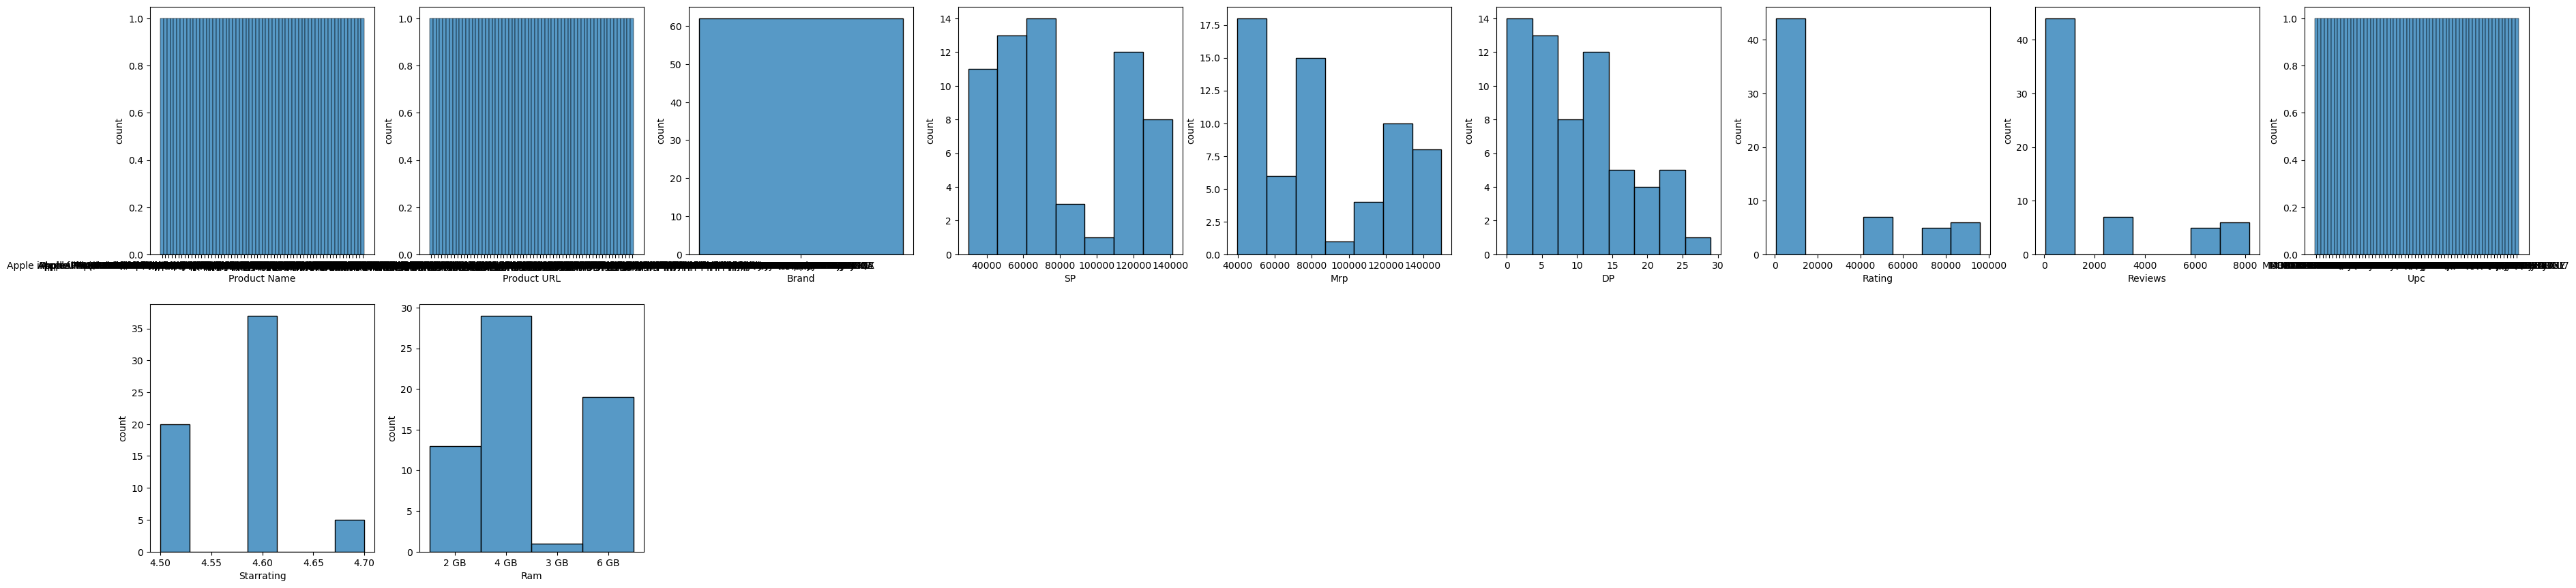

In [14]:

plt.figure(figsize=(45,50),facecolor='white')
plotnumber=1

for column in df:
  if plotnumber<=81:
    ax=plt.subplot(9,9,plotnumber)
    sns.histplot(x=df[column])
    plt.xlabel(column,fontsize=10)
    plt.ylabel("count",fontsize=10)
  plotnumber+=1
plt.tight_layout()
plt.show()

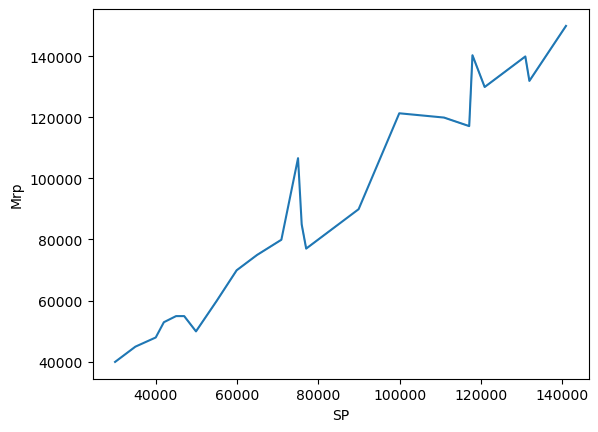

In [15]:
sns.lineplot(x=df['SP'],y=df['Mrp'])
plt.show()

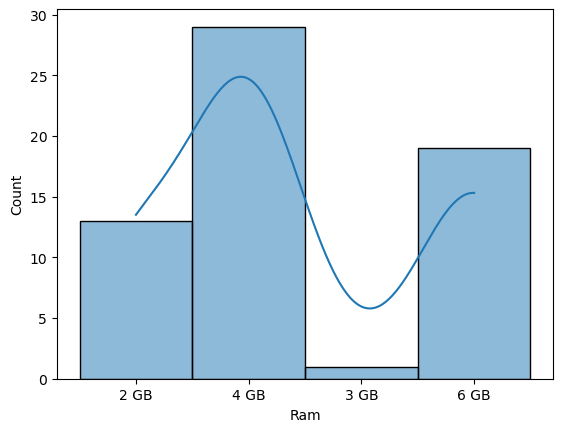

In [16]:
sns.histplot(x=df['Ram'],kde=True)
plt.show()

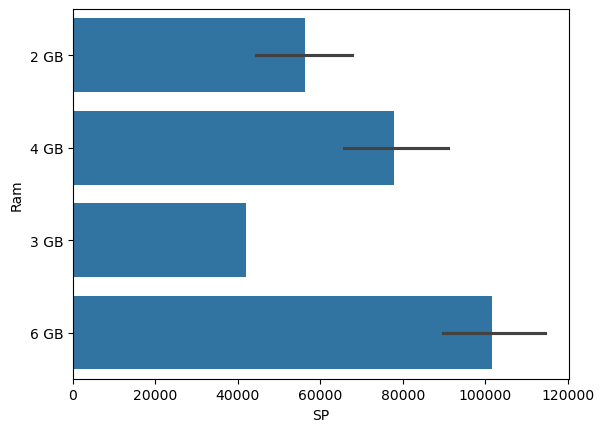

In [17]:
sns.barplot(x=df['SP'],y=df['Ram'])
plt.show()

# Bivariate Analysis

In [18]:
cat_data.columns

Index(['Product Name', 'Product URL', 'Brand', 'Upc', 'Ram'], dtype='object')

In [19]:
d1=df[['Brand','Ram']]

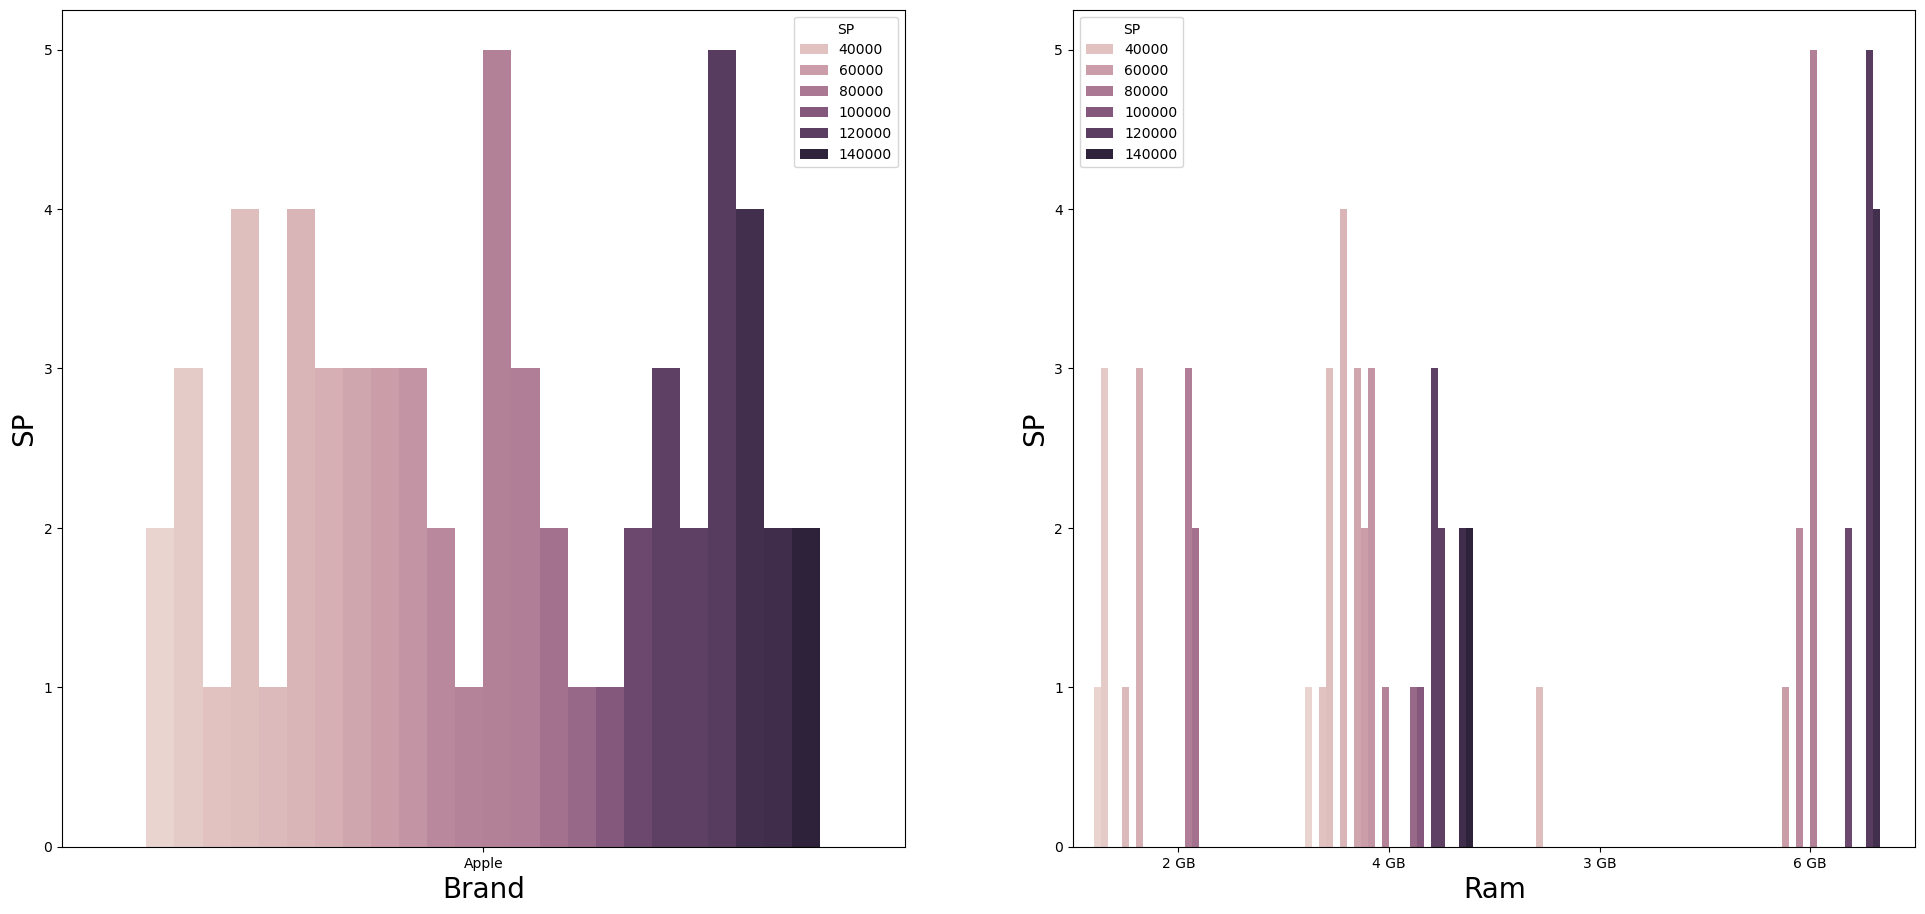

In [20]:
# Plotting how every  categorical feature correlate with the "target"
plt.figure(figsize=(50,50), facecolor='white')
plotnumber = 1

for column in d1:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=d1[column]           
                        ,hue=df.SP)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('SP',fontsize=20) 
    plotnumber+=1
plt.show()

# Data Preprocessing

In [21]:
df.isnull().sum()

Product Name    0
Product URL     0
Brand           0
SP              0
Mrp             0
DP              0
Rating          0
Reviews         0
Upc             0
Starrating      0
Ram             0
dtype: int64

# Check for outliers

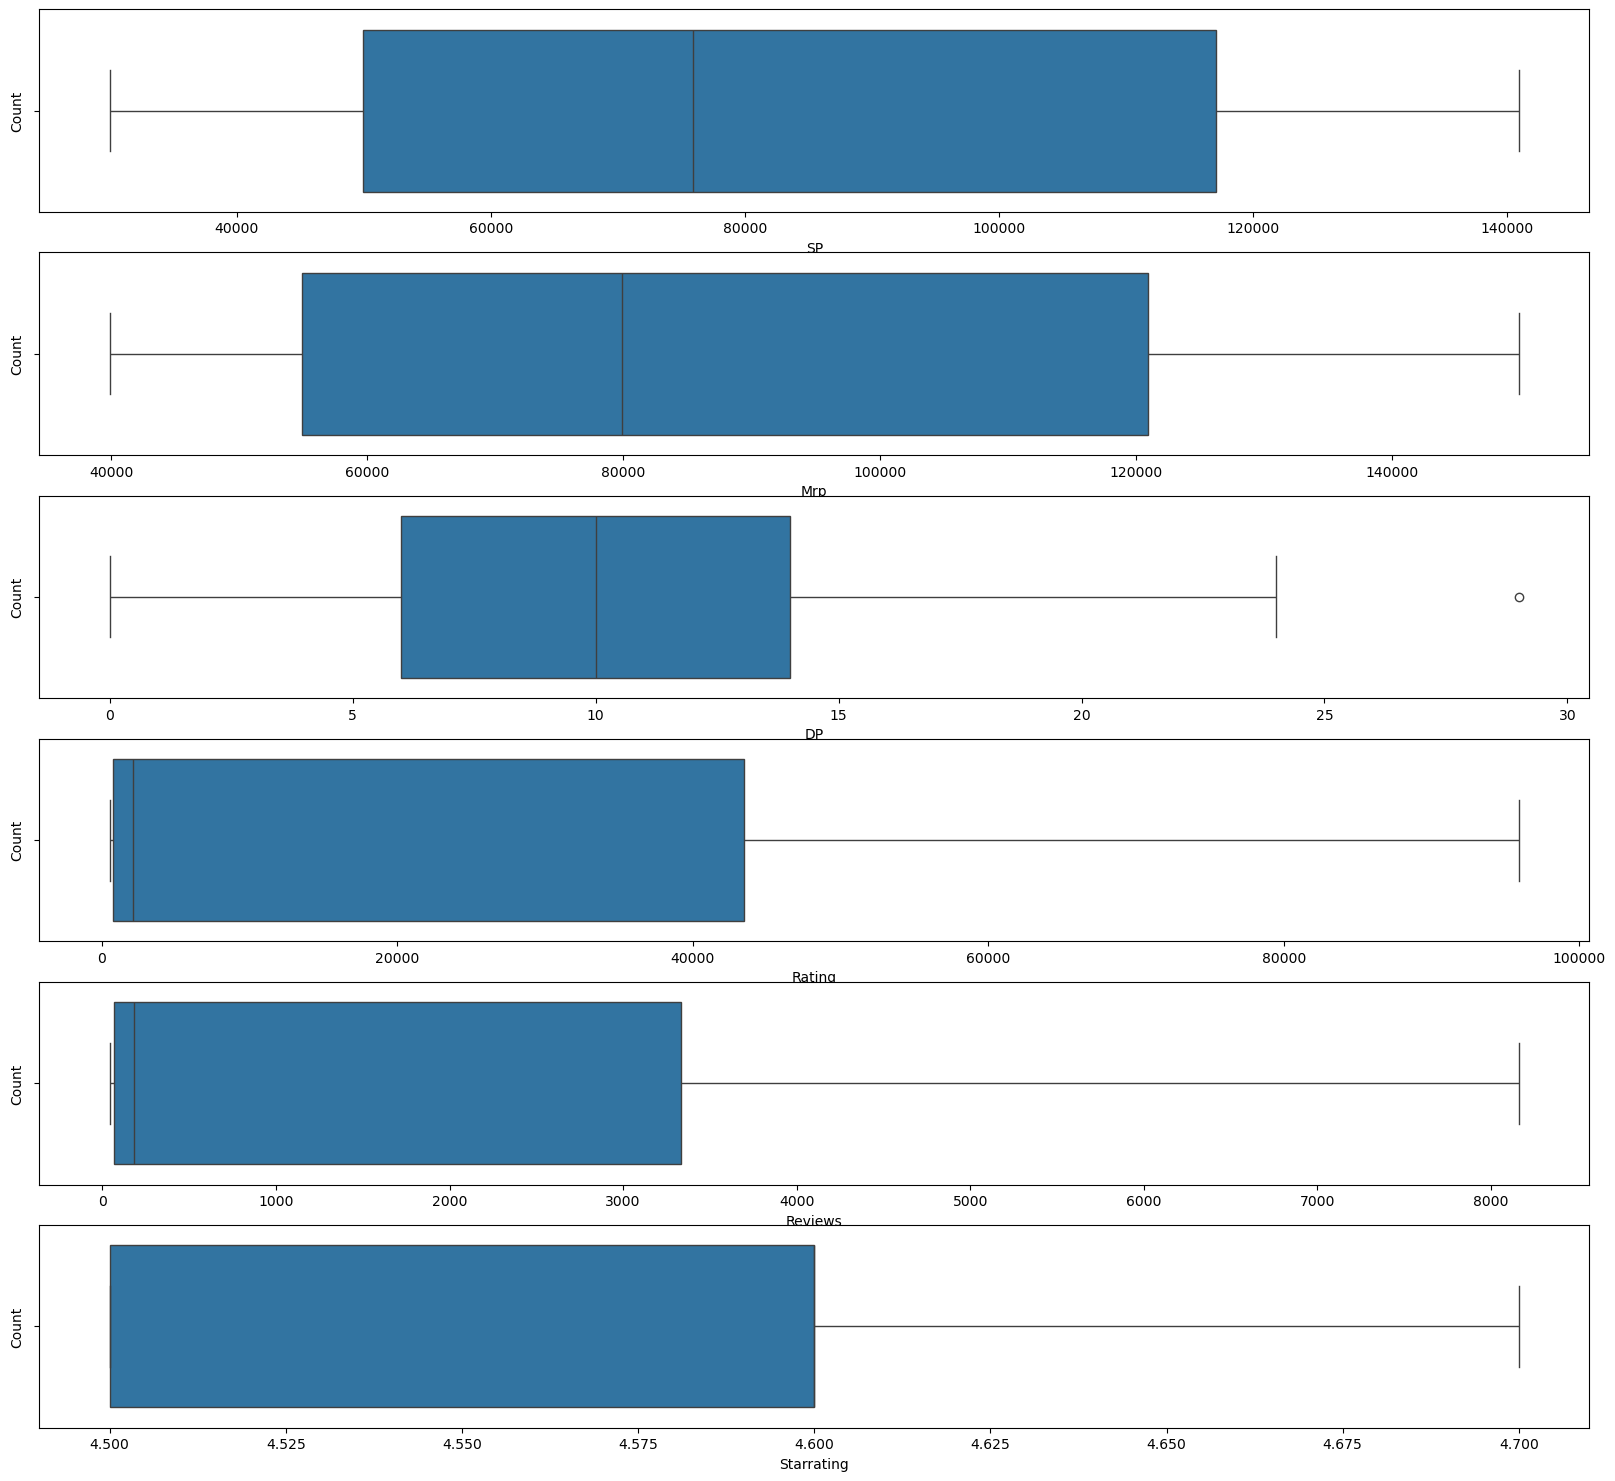

In [22]:
plt.figure(figsize=(20,50),facecolor='white')
plotnumber=1

for column in num_data:
  if plotnumber<=16:
    ax=plt.subplot(16,1,plotnumber)
    sns.boxplot(x=df[column])
    plt.xlabel(column,fontsize=10)
    plt.ylabel('Count',fontsize=10)
  plotnumber+=1
plt.show()

### There are no outliers

# Converting Categorical columns to numerical columns

In [23]:
cat_data.columns

Index(['Product Name', 'Product URL', 'Brand', 'Upc', 'Ram'], dtype='object')

In [24]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
df.Ram=lc.fit_transform(df.Ram)

In [25]:
df

,Product Name,Product URL,Brand,SP,Mrp,DP,Rating,Reviews,Upc,Starrating,Ram
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,49900,49900,0,3431,356,MOBEXRGV7EHHTGUH,4.6,0
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVAC6TJT4F,4.6,0
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVGETABXWZ,4.6,0
3,"APPLE iPhone 8 (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-silver...,Apple,77000,77000,0,11202,794,MOBEXRGVMZWUHCBA,4.5,0
4,"APPLE iPhone 8 (Gold, 256 GB)",https://www.flipkart.com/apple-iphone-8-gold-2...,Apple,77000,77000,0,11202,794,MOBEXRGVPK7PFEJZ,4.5,0
...,...,...,...,...,...,...,...,...,...,...,...
57,"APPLE iPhone SE (Black, 64 GB)",https://www.flipkart.com/apple-iphone-se-black...,Apple,29999,39900,24,95909,8161,MOBFWQ6BR3MK7AUG,4.5,2
58,"APPLE iPhone 11 (Purple, 64 GB)",https://www.flipkart.com/apple-iphone-11-purpl...,Apple,46999,54900,14,43470,3331,MOBFWQ6BTFFJKGKE,4.6,2
59,"APPLE iPhone 11 (White, 64 GB)",https://www.flipkart.com/apple-iphone-11-white...,Apple,46999,54900,14,43470,3331,MOBFWQ6BVWVEH3XE,4.6,2
60,"APPLE iPhone 11 (Black, 64 GB)",https://www.flipkart.com/apple-iphone-11-black...,Apple,46999,54900,14,43470,3331,MOBFWQ6BXGJCEYNY,4.6,2


In [26]:
num_data.columns

Index(['SP', 'Mrp', 'DP', 'Rating', 'Reviews', 'Starrating'], dtype='object')

In [27]:
num_data1= df[['SP', 'Mrp', 'DP', 'Rating', 'Reviews', 'Starrating','Ram']]

# Feature Engineering

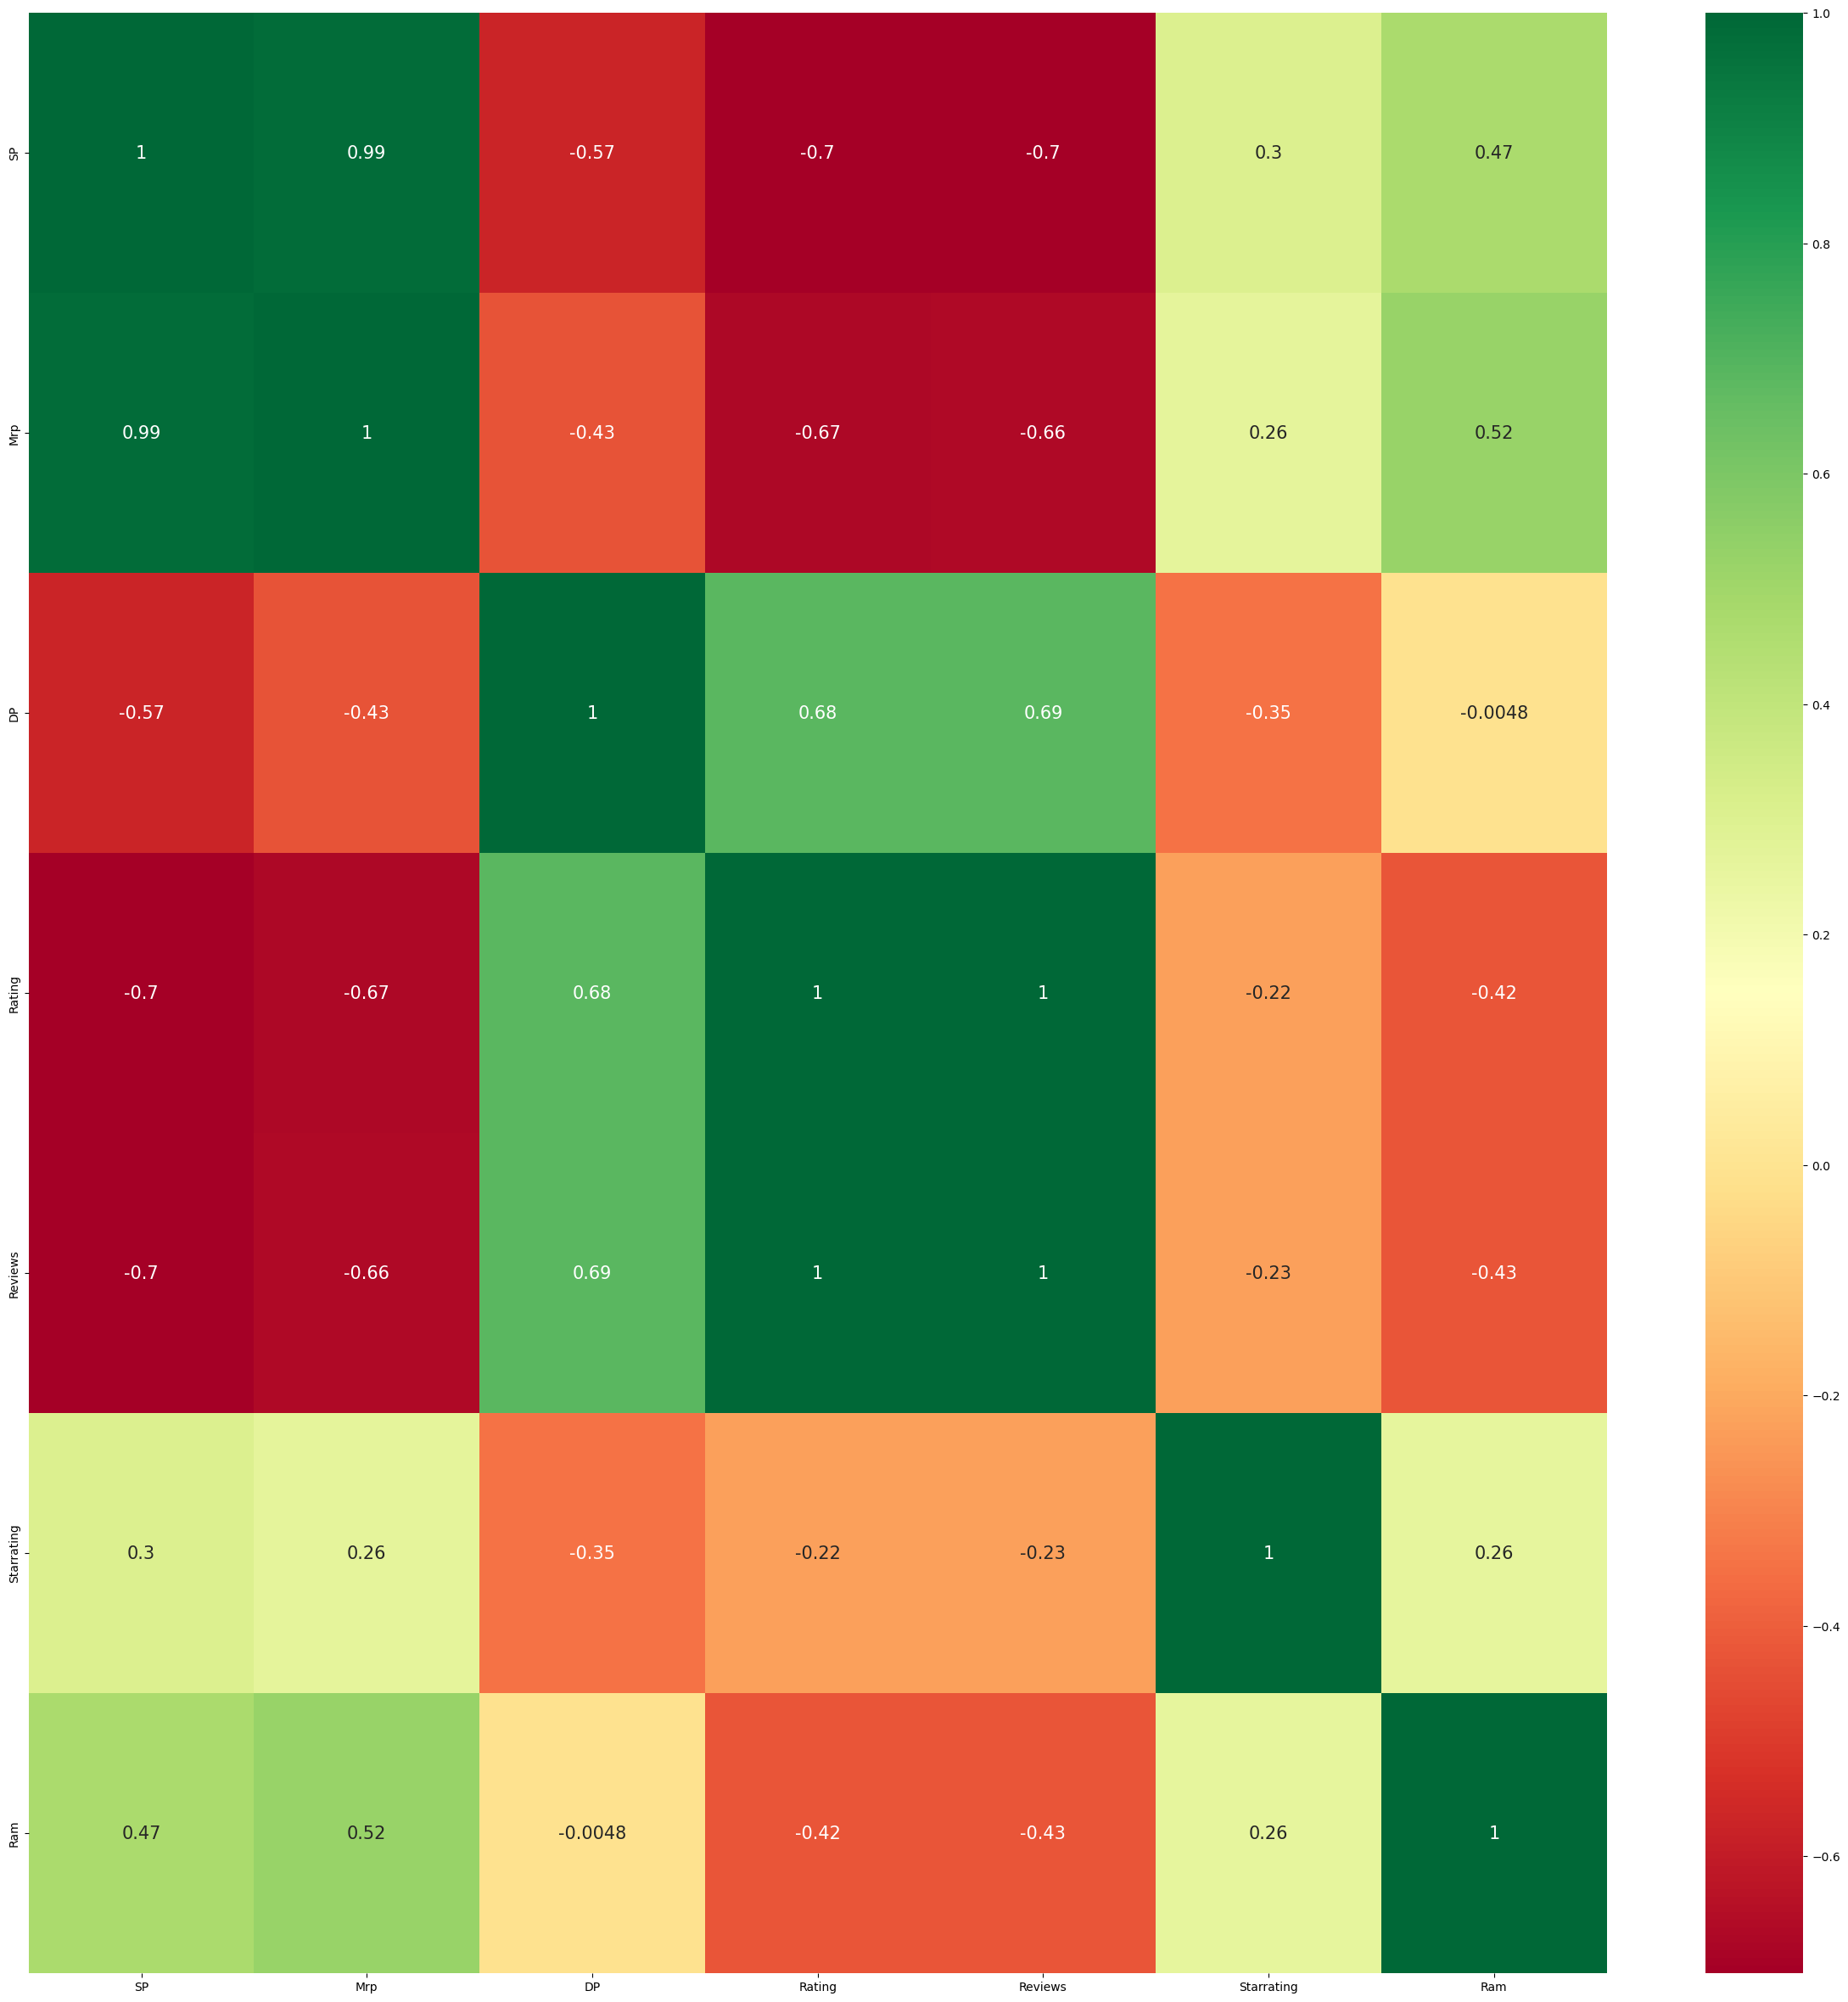

In [28]:
plt.figure(figsize=(30, 30))
sns.heatmap(num_data1.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})
plt.show()

In [29]:
# so we drop one of these
df.drop(['Product Name','Product URL','Brand','Upc'],axis=1,inplace=True)

In [30]:
df

,SP,Mrp,DP,Rating,Reviews,Starrating,Ram
0,49900,49900,0,3431,356,4.6,0
1,84900,84900,0,3431,356,4.6,0
2,84900,84900,0,3431,356,4.6,0
3,77000,77000,0,11202,794,4.5,0
4,77000,77000,0,11202,794,4.5,0
...,...,...,...,...,...,...,...
57,29999,39900,24,95909,8161,4.5,2
58,46999,54900,14,43470,3331,4.6,2
59,46999,54900,14,43470,3331,4.6,2
60,46999,54900,14,43470,3331,4.6,2


# Model Creation 

In [31]:
from sklearn.model_selection import train_test_split

x = df.drop(['SP'], axis=1)
y = df.SP
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)


In [32]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)



Mean Squared Error: 6559561.955905264
R-squared (R2) score: 0.99492523533925


In [33]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


GB = GradientBoostingRegressor(n_estimators=700)
GB.fit(x_train, y_train)

y_pred = GB.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)


Mean Squared Error: 9073.546571369521
R-squared (R2) score: 0.9999929803066427


In [34]:

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svm_regressor = SVR(kernel='linear')
svm_regressor.fit(x_train, y_train)

y_pred = svm_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)


Mean Squared Error: 21973220.76112641
R-squared (R2) score: 0.983000553245627


In [35]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

y_pred = linear_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)


Mean Squared Error: 2948432.524883503
R-squared (R2) score: 0.9977189633572384


In [36]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(x_train, y_train)

y_pred = knn_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)


Mean Squared Error: 33144898.951578945
R-squared (R2) score: 0.9743576532984527
